Regressão não-linear com lmfit
==============================



## Regressão de modelos e a função custo



É comum no meio científico nos depararmos com situações onde desejamos ajustar um modelo (expressão matemática) a um conjunto de dados. Ajustar um modelo significa encontrar valores para os parâmetros livres do modelo, idealmente fazendo com que seu objeto &ldquo;modelo + parâmetros&rdquo; *descreva bem* os dados.

<u>Terminologia</u>: ajustar um modelo é a mesma coisa que realizar uma regressão do modelo. Algumas pessoas inclusive usam o termo *fitar* o modelo que vem do verbo *to fit* do inglês que significa ajustar. Use o termo que gostar mais.

A tarefa principal do processo de ajuste de um modelo, assim como de qualquer outro problema de *otimização*, é o de minimizar uma <u>função objetivo</u>. Em problemas de regressão, a função objetivo também é conhecida como <u>função custo</u>. A escolha da sua função custo é uma das características que irá determinar o conjunto de parâmetros obtidos após uma regressão bem sucedida.

Uma função custo muito utilizada em problemas de regressão é a estatística chi-quadrado:

$$
\chi^2 = \sum_i \frac{(y_i - \hat{y}_i)^2}{\epsilon_i^2}
$$

Na equação acima temos que $y_i$ é o valor da observação $i$ da variável dependente, $\hat{y}_i$ é o valor da observação $i$ da variável dependente previsto pelo modelo (que está sendo ajustado neste caso), $\epsilon_i$ é a incerteza associada à observação $i$ da variável dependente.

Para simplificar em um primeiro momento, suponha que a incerteza de todas as observações seja a mesma e seja igual a unidade. Neste caso, a equação acima simplifica para:

$$
\chi^2 = \sum_i (y_i - \hat{y}_i)^2
$$

Quando dizemos que queremos minimizar a função custo acima, estamos dizendo que queremos minimizar a soma dos resíduos ($y_i - \hat{y}_i$) elevados ao quadrado! Como os valores são elevados ao quadrado e estamos considerando apenas números reais, então os resíduos ao quadrado serão sempre positivos. Ao minimizar essa função custo nós estamos buscando um modelo que tenha uma previsão ($\hat{y}$) que seja a mais próxima possível dos dados observados ($y$). A penalidade ao errar cada previsão é o resíduo da previsão ao quadrado! Isso faz com que o processo de regressão do modelo deva encontrar um bom balanço entre erros e acertos para tentar contemplar todos os dados.



## Método dos mínimos quadrados



Um método para realizar regressão de modelos é o *método dos mínimos quadrados*, que leva em conta a função custo apresentada na seção anterior. Para usar este método, é necessário que hajam mais dados (exemplos) do que parâmetros no seu modelo. Este método é usado em duas situações: regressão linear e regressão não-linear.

A <u>regressão linear</u> pelo método dos mínimos quadrados é um assunto clássico da álgebra linear. Os parâmetros de modelos lineares podem ser obtidos a partir de dados utilizando operações matriciais. Aqui vale a pena ver o [vídeo do StatQuest](https://youtu.be/PaFPbb66DxQ) sobre o assunto pois ele mostra de maneira bem clara a intuição por trás da regressão linear.

A <u>regressão não-linear</u> pelo método dos mínimos quadrados é um processo iterativo que envolve, entre outras coisas, aproximar o modelo não-linear para um modelo linear para o cálculo do gradiente (necessário para encontrar um conjunto de bons parâmetros). Por conta das aproximações e do processo iterativo, a solução deste problema também *depende do palpite inicial para os parâmetros do modelo*. Em outras palavras, se você tem um modelo não-linear com 3 parâmetros {$a$, $b$ e $c$}, então os valores de convergência para esses parâmetros vão depender do valor inicial dos mesmos que você escolheu antes de iniciar o processo iterativo.



## Ajustando um modelo linear com Python



Ajustar um modelo linear com Python não é o objetivo deste notebook, mas para fins de deixar o material completo vamos ver um exemplo abaixo. Primeiramente devemos ter os dados armazenados em objetos de Python.



In [29]:
import numpy as np

x = np.array(
    [
        0.34563215,
        0.48144444,
        0.35362359,
        0.55546403,
        0.72992913,
        0.34507015,
        0.3770801,
        0.80482923,
        0.60515981,
        0.70708067,
    ]
)

y = np.array(
    [
        1.24340503,
        1.71826047,
        1.54637931,
        1.63528304,
        1.4906068,
        1.33604004,
        1.18417439,
        1.73653853,
        1.35347015,
        1.32470983,
    ]
)

Agora podemos usar a função `linregress` do módulo `scipy` com nossos dados. Essa função não apenas realiza a regressão linear mas também nos entrega algumas estatísticas.



Coeficiente angular: 0.4741149339111112
Coeficiente linear: 1.2053539325392761
Coeficiente de correlação de Pearson: 0.42256723655795453
p-valor: 0.2237596868307045
Erro padrão do coef. angular: 0.35952569330682305
Erro padrão do coef. linear: 0.19994384481143393
R quadrado da regressão: 0.1785630694122263


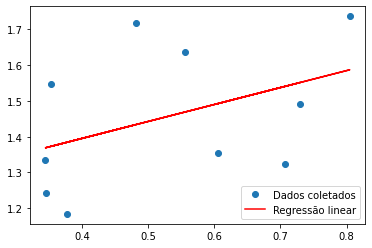

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

regressao = linregress(x, y)

print(
    f"Coeficiente angular: {regressao.slope}",
    f"Coeficiente linear: {regressao.intercept}",
    f"Coeficiente de correlação de Pearson: {regressao.rvalue}",
    f"p-valor: {regressao.pvalue}",
    f"Erro padrão do coef. angular: {regressao.stderr}",
    f"Erro padrão do coef. linear: {regressao.intercept_stderr}",
    f"R quadrado da regressão: {regressao.rvalue ** 2}",
    sep="\n",
)

plt.plot(x, y, "o", label="Dados coletados")
plt.plot(
    x,
    regressao.intercept + regressao.slope * x,
    "r",
    label="Regressão linear",
)
plt.legend()
plt.show()

O método acima apenas funciona caso sua variável independente (`x`) seja um vetor de uma dimensão. No jargão de aprendizado de máquina, dizemos que este vetor corresponde a apenas um atributo (feature). Caso tenha um problema com diversos atributos e deseje realizar uma regressão linear, veja a classe [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) do módulo `scikit-learn`.



## Ajustando um modelo não-linear com Python



Um ajuste não-linear começa da mesma maneira que um ajuste linear: coletando-se os dados! Para este exemplo, vamos considerar um problema real na área de ciência de materiais que é a reologia de líquidos. Mais especificamente, vamos estudar a viscosidade de líquidos óxidos.

<u>Definições</u>: *reologia* é a área do conhecimento que o estuda o escoamento (&ldquo;reo&rdquo; vem do grego &ldquo;ῥέω&rdquo; que significa escoar). *Viscosidade* é uma propriedade inerente de fluidos e está relacionada a resistência do mesmo a escoar (ou, em outras palavras, a resistência do mesmo em se deformar plasticamente). Quanto maior a viscosidade, maior a resistência do fluido a escoar. O exemplo clássico é lembrar que mel tem maior viscosidade que água na temperatura ambiente.

Fomos na literatura e coletamos os dados abaixo de temperatura e viscosidade medidos para um líquido óxido de composição Na<sub>2</sub>O.2SiO<sub>2</sub> (chamamos isso de dissilicato de sódio no departamento de materiais, mas certamente existem outras formas de nomear esse líquido).



In [30]:
# temperatura em Kelvin
x = np.array(
    [
        703, 713, 719, 720, 724, 728, 729, 730, 732, 733, 734, 738, 739, 741,
        742, 743, 744, 747, 752, 753, 756, 768, 769, 773, 783, 784, 795, 799,
        808, 810, 812, 822, 823, 828, 834, 838, 843, 845, 847, 850, 851, 855,
        858, 859, 862, 866, 869, 871, 873, 880, 882, 893, 895, 896, 903, 906,
        913, 923, 926, 933, 940, 943, 953, 957, 963, 967, 973, 984, 988, 1000,
        1018, 1020, 1023, 1033, 1038, 1057, 1073, 1088, 1096, 1098, 1100, 1106,
        1115, 1123, 1127, 1133, 1135, 1141, 1147, 1158, 1172, 1173, 1200, 1203,
        1223, 1230, 1233, 1253, 1268, 1273, 1276, 1295, 1300, 1318, 1333, 1368,
        1371, 1373, 1378, 1423, 1433, 1442, 1468, 1473, 1478, 1507, 1513, 1518,
        1523, 1533, 1568, 1573, 1576, 1578, 1623, 1633, 1673, 1677, 1723, 1773,
        1823, 1873, 1973, 2073, 2173, 2273,
    ]

)

# viscosidade em Pa.s
y = np.array(
    [
        1.0e12, 6.9e11, 5.0e11, 7.6e11, 2.5e11, 5.0e11, 1.6e11, 2.0e11, 1.4e11,
        2.2e11, 6.3e10, 1.0e11, 4.6e10, 1.0e11, 2.5e10, 8.9e10, 2.2e10, 1.3e10,
        1.0e11, 1.9e10, 2.0e10, 5.0e9, 8.9e8, 7.9e9, 1.9e9, 3.3e8, 3.3e8, 7.2e7,
        3.5e7, 2.3e7, 1.7e8, 1.0e8, 8.9e6, 8.9e6, 2.2e7, 5.5e6, 1.6e7, 5.5e6,
        6.6e6, 1.0e7, 3.5e6, 1.0e7, 5.1e6, 2.0e6, 2.8e6, 1.7e6, 4.0e6, 3.4e6,
        2.0e6, 1.7e6, 1.9e6, 1.2e6, 1.0e6, 9.0e5, 8.1e5, 4.5e5, 5.6e5, 2.2e5,
        3.1e5, 3.4e5, 1.0e5, 2.4e5, 2.1e5, 8.2e4, 2.1e5, 7.9e4, 2.6e4, 1.1e5,
        3.2e4, 3.5e4, 1.0e4, 1.2e4, 6.9e3, 6.4e3, 6.3e3, 3.6e3, 2.0e3, 1.7e3,
        2.2e3, 1.3e3, 4.1e3, 1.0e3, 1.0e3, 6.8e2, 7.2e2, 8.4e2, 6.3e2, 5.9e2,
        5.0e2, 7.0e2, 4.6e2, 3.2e2, 9.1e2, 2.3e3, 1.9e2, 4.2e2, 2.0e2, 1.5e2,
        1.3e2, 8.0e1, 1.2e2, 9.7e1, 3.0e2, 7.9e1, 5.9e1, 5.0e1, 4.3e1, 3.2e1,
        3.7e1, 3.0e1, 2.2e1, 2.2e1, 1.6e1, 1.4e1, 1.5e1, 1.0e1, 1.2e1, 1.3e1,
        8.9, 9.5, 7.9, 7.1, 6.0, 7.0, 4.4, 4.8, 3.3, 3.0, 2.0, 3.2, 1.0, 2.5,
        2.0, 1.6, 1.3, 1.0,
    ]
)

Vamos ver os dados em um gráfico!



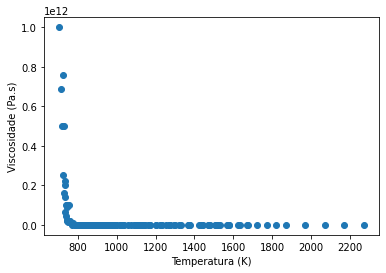

In [31]:
plt.plot(x, y, "o", label="Dados coletados")
plt.xlabel("Temperatura (K)")
plt.ylabel("Viscosidade (Pa.s)")
plt.show()

Ruim não é? Os dados armazenados em `y` variam muitas ordens de grandeza (12 ordens de grandeza para ser mais preciso). Se seguirmos em frente com esses dados para nossa regressão, o método dos mínimos quadrados irá dar **muita** preferência para os dados com maior magnitude e irá praticamente **ignorar** os dados de menor magnitude. Será que é isso que desejamos? Acredito fortemente que não!

Para minimizar esse problema da magnitude, uma estratégia usual é trabalhar na escala logarítmica ao invés da escala linear. Vamos transformar nossos dados aplicando um logaritmo e ver o que acontece.



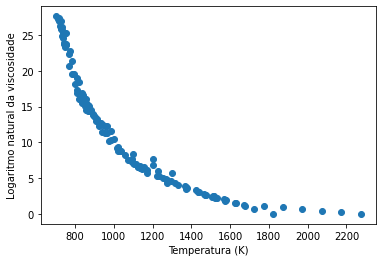

In [32]:
y_log = np.log(y)
plt.plot(x, y_log, "o", label="Dados coletados")
plt.xlabel("Temperatura (K)")
plt.ylabel("Logaritmo natural da viscosidade")
plt.show()

HÁ! Muito melhor! Agora conseguimos ver todos os dados do fenômeno sendo estudado e observamos que os dados da nossa variável dependente (`y`) variam em torno de uma ordem de grandeza, o que é perfeitamente válido e não irá nos dar dor de cabeça quando aplicarmos o método dos mínimos quadrados.

O próximo passo para realizar uma regressão não-linear é identificar o modelo e os parâmetros deste modelo que vamos ajustar aos dados. Geralmente, nesta etapa nós consultamos a literatura em busca de modelos apropriados. Um dos modelos de viscosidade mais usados na literatura de líquidos óxidos é chamado de VFT e sua equação matemática está abaixo.

$$
\eta(T) = \eta_\infty \exp\left(\frac{A}{T - T_0}\right)
$$

Na equação acima temos que $\eta$ é a viscosidade, $T$ é a temperatura, e $\eta_\infty$, $A$ e $T_0$ são os parâmetros do modelo (são para eles que queremos encontrar valores que se ajustam bem aos dados durante o processo de regressão).

Aqui temos um problema, a variável dependente neste caso é a viscosidade, mas decidimos a pouco que iremos trabalhar com o *logaritmo da viscosidade*. Precisamos alterar nosso modelo de acordo com a transformação que realizamos. Para isso, basta aplicar logaritmo dos dois lados da equação.

$$
\ln(\eta(T)) = \ln(\eta_\infty) + \frac{A}{T - T_0}
$$

Veja que essa transformação não alterou o número de parâmetros do modelo (ainda são 3).

Vamos escrever esse modelo como uma função de Python. Note que a variável independente (que é a temperatura neste caso) deve ser o primeiro argumento da nossa função. Todos os parâmetros do modelo devem ser os demais argumentos na ordem que desejar.



In [33]:
def VFT(T, log_eta_inf, A, T0):
    """Computa o logaritmo da viscosidade pela eq. de VFT."""
    log_viscosidade = log_eta_inf + A / (T - T0)
    return log_viscosidade

Agora iremos usar o módulo `lmfit` para criar uma instância da classe `Model` usando a função do modelo que criamos como argumento. Se você escreveu sua função seguindo as regras acima, o próprio `lmfit` irá entender qual é a sua variável independente e os parâmetros do seu modelo.



In [34]:
from lmfit import Model

modelo_VFT = Model(VFT)

print(f'Variável independente: {modelo_VFT.independent_vars}')
print(f'Parâmetros do modelo: {modelo_VFT.param_names}')

Variável independente: ['T']
Parâmetros do modelo: ['log_eta_inf', 'A', 'T0']


Assim como comentado acima, uma regressão não-linear requer que você forneça palpites para os parâmetros do seu modelo. Uma forma de criar um objeto de parâmetros é usando o método `make_params` do modelo.



In [35]:
params = modelo_VFT.make_params(log_eta_inf=-3, A=1000, T0=500)

No código acima nós criamos uma nova variável chamada `params` que será usada na regressão não-linear que acontecerá na próxima célula de código. Para isso, nós demos nosso palpite inicial para os parâmetros do modelo. O palpite para $\ln(\eta_\infty)$ foi de `-3`, o palpite para $A$ foi de `1000` e o palpite para $T_0$ foi de `500`. Estes valores foram escolhidos usando do conhecimento prévio de quem redigiu este notebook. São valores usuais que estes parâmetros costumam ter no contexto de líquidos óxidos. Se você não conhece os valores usuais dos parâmetros do modelo que está ajustando, você pode dar como palpite inicial o valor de `1` para todos os parâmetros e ver o que acontece. Se algo der errado, volte aqui e altere os parâmetros para tentar novamente.

Finalmente, vamos fazer e regressão não-linear do modelo! 🎉 Para isso, usaremos o método `fit` do modelo, fornecendo os dados da variável dependente e nosso objeto `params`. Também precisamos passar para o modelo os valores da variável independente. Neste caso, a variável independente se chama `T`, por isso passamos os dados de temperatura armazenados na variável `x` no argumento `T` dentro do método `fit`. O resultado do ajuste ficou armazenado na variável `resultado_fit`. Podemos ver um relatório do resultado usando o método `fit_report`.



In [36]:
resultado_fit = modelo_VFT.fit(y_log, params, T=x)
print(resultado_fit.fit_report())

[[Model]]
    Model(VFT)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 27
    # data points      = 136
    # variables        = 3
    chi-square         = 51.6433854
    reduced chi-square = 0.38829613
    Akaike info crit   = -125.687816
    Bayesian info crit = -116.949851
[[Variables]]
    log_eta_inf: -4.98328223 +/- 0.26567595 (5.33%) (init = -3)
    A:            7798.33493 +/- 258.313945 (3.31%) (init = 1000)
    T0:           476.315196 +/- 6.90534818 (1.45%) (init = 500)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, T0)           = -0.980
    C(log_eta_inf, A)  = -0.953
    C(log_eta_inf, T0) =  0.890


Com o ajuste feito, podemos ver como o modelo se ajusta aos dados e como ele se compara com o nosso palpite inicial.



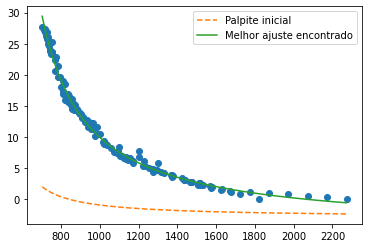

In [37]:
plt.plot(x, y_log, 'o')
plt.plot(x, resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(x, resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.legend()
plt.show()

Um gráfico contendo o ajuste e os resíduos é facilmente obtido com o método `plot`.



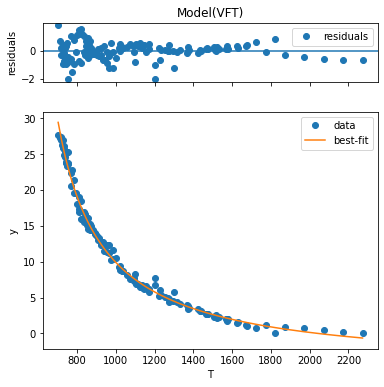

In [38]:
resultado_fit.plot()
plt.show()

As bandas de confiança do ajuste podem ser obtidas com o método `eval_uncertainty`. Aqui estamos usando um valor alto de confiança de 3$\sigma$ que corresponde a uma confiança de aproximadamente 99%.



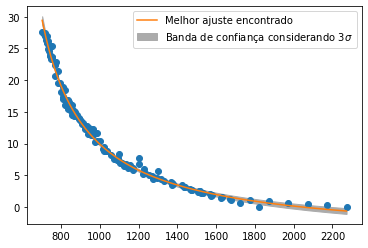

In [39]:
SIGMA = 3

banda = resultado_fit.eval_uncertainty(sigma=SIGMA)

plt.plot(x, y_log, 'o')
plt.plot(x, resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.fill_between(
    x,
    resultado_fit.best_fit - banda,
    resultado_fit.best_fit + banda,
    color="#ABABAB",
    label=rf"Banda de confiança considerando {SIGMA}$\sigma$",
)
plt.legend()
plt.show()

Podemos também avaliar a incerteza dos parâmetros de ajuste usando o método `ci_report`.



In [40]:
print(resultado_fit.ci_report(ndigits=2))

             99.73% 95.45% 68.27% _BEST_ 68.27% 95.45% 99.73%
 log_eta_inf:  -0.83  -0.54  -0.27  -4.98  +0.26  +0.52  +0.78
 A          :-737.82-497.34-252.407798.33+263.17+540.74+837.56
 T0         : -22.12 -14.35  -7.01 476.32  +6.78 +13.39 +19.94


Um conceito importante do módulo `lmfit` que estamos usando é que o objeto do modelo e o objeto do resultado do ajuste são entidades diferentes. Podemos, por exemplo, reusar o mesmo objeto de modelo para *realizar um ajuste considerando outro conjunto de dados*! Vamos ver um exemplo.



[[Model]]
    Model(VFT)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 46
    # data points      = 23
    # variables        = 3
    chi-square         = 1.68057458
    reduced chi-square = 0.08402873
    Akaike info crit   = -54.1762448
    Bayesian info crit = -50.7697622
[[Variables]]
    log_eta_inf: -6.11537885 +/- 0.44493140 (7.28%) (init = -3)
    A:            5042.74889 +/- 486.694004 (9.65%) (init = 1000)
    T0:           538.120344 +/- 13.3594232 (2.48%) (init = 500)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, T0)           = -0.998
    C(log_eta_inf, A)  = -0.987
    C(log_eta_inf, T0) =  0.980


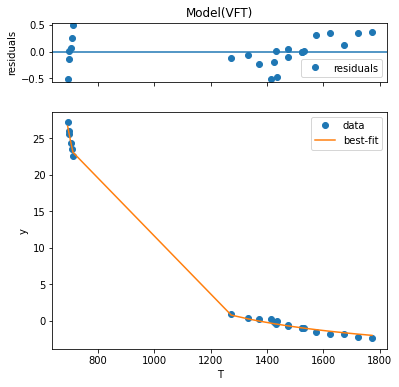

In [41]:
# temperatura em Kelvin
x2 = np.array(
    [
        692, 695, 698, 703, 707, 711, 1273, 1333, 1373, 1413, 1424, 1433, 1435,
        1473, 1474, 1523, 1524, 1533, 1573, 1623, 1673, 1723, 1773,
    ]

)

# viscosidade em Pa.s
y2 = np.array(
    [
        6.31e11, 2.00e11, 1.26e11, 3.98e10, 1.58e10, 6.31e9, 2.38, 1.35, 1.17,
        1.17, 7.94e-1, 6.10e-1, 9.77e-1, 4.60e-1, 5.37e-1, 3.76e-1, 3.72e-1,
        3.50e-1, 2.14e-1, 1.62e-1, 1.66e-1, 1.10e-1, 9.12e-2,
    ]
)

y_log2 = np.log(y2)

resultado_fit2 = modelo_VFT.fit(y_log2, params, T=x2)
print(resultado_fit2.fit_report())

resultado_fit2.plot()
plt.show()

O gráfico ficou feio, não é? Isto é porque o `lmfit` só computa o modelo na posição onde temos valores da variável independente&#x2026; para resolver isso use o argumento `numpoints`.



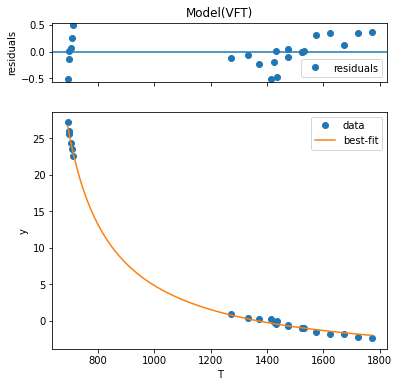

In [42]:
resultado_fit2.plot(numpoints=100)
plt.show()

Se você precisar usar o seu modelo ajustado para realizar previsões, use o método `eval`. Precisamos passar os valores onde desejamos computar como argumento usando o nome da variável independente do modelo!



In [43]:
temperaturas = [1000, 1200, 1400]
print(resultado_fit.eval(T=temperaturas))
print(resultado_fit2.eval(T=temperaturas))

[9.90799371 5.79258992 3.45935414]
[ 4.80250598  1.50345162 -0.26450529]


## XKCDs relevantes



![img](https://imgs.xkcd.com/comics/linear_regression.png)

`Imagem: Linear Regression (XKCD) disponível em https://xkcd.com/1725`



![img](https://imgs.xkcd.com/comics/curve_fitting.png)

`Imagem: Curve Fitting (XKCD) disponível em https://xkcd.com/2048`



## Referências e leitura adicional



1.  [https://youtu.be/PaFPbb66DxQ](https://youtu.be/PaFPbb66DxQ)
2.  [https://youtu.be/nk2CQITm_eo](https://youtu.be/nk2CQITm_eo)
3.  [https://lmfit.github.io/lmfit-py/model.html](https://lmfit.github.io/lmfit-py/model.html)
4.  [https://lmfit.github.io/lmfit-py/confidence.html](https://lmfit.github.io/lmfit-py/confidence.html)
5.  [https://lmfit.github.io/lmfit-py/constraints.html](https://lmfit.github.io/lmfit-py/constraints.html)

